<a href="https://colab.research.google.com/github/byOKO/Deep_Learning/blob/main/01_MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 첫번째 실습. Keras 모델 생성/학습 - MNIST : MLP
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [ ]:
# 1. 데이터 불러오기
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


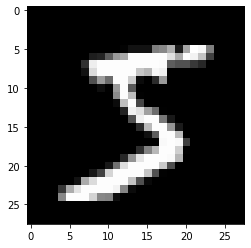

In [ ]:
# 2. 이미지 데이터 확인하기 🖼

import matplotlib.pyplot as plt

image_show = X_train[0]
plt.imshow(image_show, cmap=plt.cm.gray) #이미지 출력, 흑백으로(cmap이용)

In [ ]:
print(y_train[0])   # 이미지에 대한 레이블 확인

5


In [ ]:
# 3-1. 이미지 데이터 전처리 : 2차원->1차원 🌟🌟🌟

print(X_train[0].shape) # 흑백 이미지, channel = 1 (28, 28, 1)

X_train_reshaped = X_train.reshape((60000,28*28)) #(-1.28*28) 도 같은 결과
X_test_reshaped = X_test.reshape((10000,28*28))

print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

(28, 28)
(60000, 784)
(10000, 784)


In [ ]:
print(X_train[0])
print(X_train_reshaped[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# 3-2. 이미지 데이터 전처리 : Normalzation 

# 0~255 -> 0~1 최댓값이 1이 되도록 나누어줌

X_train_reshaped = X_train_reshaped/255
X_test_reshaped = X_test_reshaped/255

# print(X_train_reshaped[0])

In [ ]:
# 4. Label 전처리 (one-hot encoding) 
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [ ]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print(y_train_encoded[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
type(y_train[0])
type(y_test_encoded[0])

numpy.ndarray

In [ ]:
# 5. 모델 생성 : MLP
from tensorflow import keras
from keras import layers

model = keras.Sequential()

model.add(layers.Dense(512,input_dim=784, activation = 'relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 6. Compile - Optimizer, Loss function 설정
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 7. 모델 학습시키기
batch_size = 64
epochs = 50

history = model.fit(X_train_reshaped, y_train_encoded,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs)


Epoch 1/50
750/750 [==============================] - 5s 6ms/step - loss: 0.8820 - accuracy: 0.7395 - val_loss: 0.4069 - val_accuracy: 0.8862
Epoch 2/50
750/750 [==============================] - 4s 6ms/step - loss: 0.3795 - accuracy: 0.8911 - val_loss: 0.3166 - val_accuracy: 0.9082
Epoch 3/50
750/750 [==============================] - 5s 6ms/step - loss: 0.3193 - accuracy: 0.9065 - val_loss: 0.2839 - val_accuracy: 0.9190
Epoch 4/50
750/750 [==============================] - 5s 6ms/step - loss: 0.2826 - accuracy: 0.9179 - val_loss: 0.2594 - val_accuracy: 0.9252
Epoch 5/50
750/750 [==============================] - 4s 6ms/step - loss: 0.2537 - accuracy: 0.9255 - val_loss: 0.2329 - val_accuracy: 0.9300
Epoch 6/50
750/750 [==============================] - 4s 6ms/step - loss: 0.2262 - accuracy: 0.9332 - val_loss: 0.2060 - val_accuracy: 0.9412
Epoch 7/50
750/750 [==============================] - 5s 6ms/step - loss: 0.1996 - accuracy: 0.9410 - val_loss: 0.1890 - val_accuracy: 0.9461
Epoch 

In [ ]:
# 8. 모델 평가하기
loss_test, acc_test = model.evaluate(X_test_reshaped, y_test_encoded)

print(loss_test)
print(acc_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9802
0.08976061642169952
0.9801999926567078


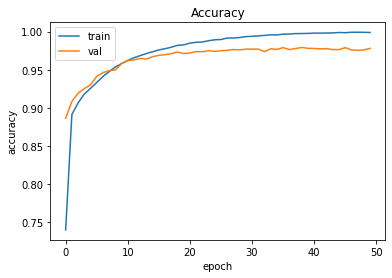

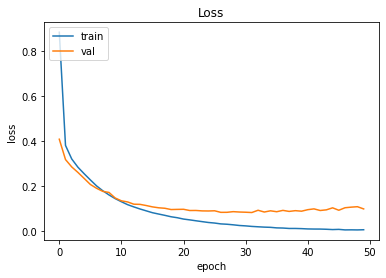

In [ ]:
# 9. 학습 시각화하기
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()


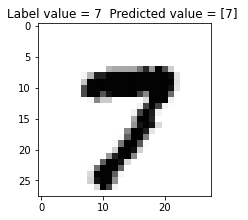

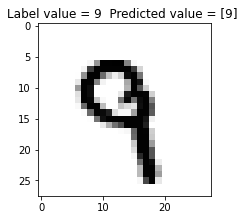

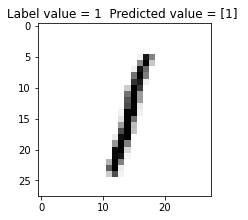

In [ ]:
# 10. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼
import numpy as np
for index in np.random.choice(len(y_test), 3, replace = False):
    test_image = X_test[index].reshape(1, 784)
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()
